# K-Means Clustering

## Importing the libraries

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import plotly.express as px

## Importing the dataset

In [46]:
dataset = pd.read_csv('/Users/rdesh723/Desktop/ML_Codes/Datasets/catch_shoot.csv')
dataset=dataset.fillna(0)

dataset=dataset[(dataset['CATCH_SHOOT_FGM']>10)&(dataset['POINTS_PER_MIN']>0)]
X = dataset.iloc[:, [1,2]].values

dataset

,PLAYER_NAME,CATCH_SHOOT_FGM,POINTS_PER_MIN,2023_24
0,Donte DiVincenzo,240,0.305085,"$10,900,000"
1,Klay Thompson,228,0.290280,"$43,219,440"
2,Bogdan Bogdanovic,196,0.238651,"$18,700,000"
3,Stephen Curry,190,0.231627,"$51,915,615"
4,Sam Hauser,179,0.307295,"$1,927,896"
...,...,...,...,...
326,Eugene Omoruyi,11,0.083969,"$1,459,782"
327,Justin Champagnie,11,0.140426,"$254,412"
328,Terquavion Smith,11,0.392857,"$559,782"
329,Jared Rhoden,11,0.130612,"$559,782"


In [47]:
len(X)

331

## Using the elbow method to find the optimal number of clusters

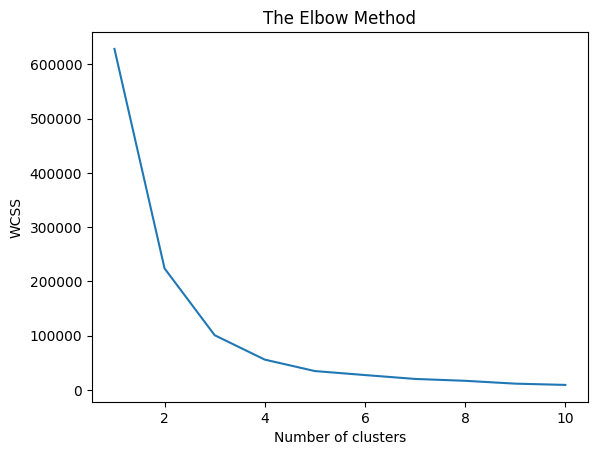

In [48]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [49]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 41)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [50]:
len(y_kmeans)

331

## Visualising the clusters

In [63]:
X_DF=pd.DataFrame(X)
X_DF.columns=['CATCH_SHOOT_FGM_','POINTS_PER_MIN_']
X_DF['CATCH_SHOOT_FGM_']=X_DF['CATCH_SHOOT_FGM_'].astype(int)
X_DF.head()

,CATCH_SHOOT_FGM_,POINTS_PER_MIN_
0,240,0.305085
1,228,0.290280
2,196,0.238651
3,190,0.231627
4,179,0.307295


In [64]:
dataset.head()

,PLAYER_NAME,CATCH_SHOOT_FGM,POINTS_PER_MIN,2023_24
0,Donte DiVincenzo,240,0.305085,"$10,900,000"
1,Klay Thompson,228,0.290280,"$43,219,440"
2,Bogdan Bogdanovic,196,0.238651,"$18,700,000"
3,Stephen Curry,190,0.231627,"$51,915,615"
4,Sam Hauser,179,0.307295,"$1,927,896"


In [67]:
Final=X_DF.merge(dataset,left_on=["POINTS_PER_MIN_","CATCH_SHOOT_FGM_"], right_on=["POINTS_PER_MIN","CATCH_SHOOT_FGM"])
Final=Final[["POINTS_PER_MIN_","CATCH_SHOOT_FGM_","PLAYER_NAME","2023_24"]]
Final.columns=["POINTS_PER_MIN_",'CATCH_SHOOT_FGM_',"PLAYER_NAME","Salary"]

Final["value"]=y_kmeans
Final

,POINTS_PER_MIN_,CATCH_SHOOT_FGM_,PLAYER_NAME,Salary,value
0,0.305085,240,Donte DiVincenzo,"$10,900,000",2
1,0.290280,228,Klay Thompson,"$43,219,440",2
2,0.238651,196,Bogdan Bogdanovic,"$18,700,000",2
3,0.231627,190,Stephen Curry,"$51,915,615",2
4,0.307295,179,Sam Hauser,"$1,927,896",2
...,...,...,...,...,...
326,0.083969,11,Eugene Omoruyi,"$1,459,782",1
327,0.140426,11,Justin Champagnie,"$254,412",1
328,0.392857,11,Terquavion Smith,"$559,782",1
329,0.130612,11,Jared Rhoden,"$559,782",1


In [68]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [69]:
fig=px.scatter(Final[Final['value']==0], x="POINTS_PER_MIN_", y="CATCH_SHOOT_FGM_", color_discrete_sequence=['red'],
        hover_data=["PLAYER_NAME","Salary"],
        height=700, width=900,
        )

fig2=px.scatter(Final[Final['value']==1], x="POINTS_PER_MIN_", y="CATCH_SHOOT_FGM_", color_discrete_sequence=['blue'],
        hover_data=["PLAYER_NAME","Salary"],
        height=700, width=900,
        )

fig3=px.scatter(Final[Final['value']==2], x="POINTS_PER_MIN_", y="CATCH_SHOOT_FGM_", color_discrete_sequence=['orange'],
        hover_data=["PLAYER_NAME","Salary"],
        height=700, width=900,
        )
fig4=px.scatter(kmeans.cluster_centers_, kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], color_discrete_sequence=['yellow'],
        height=1000, width=1000,
        )
fig4.update_traces(marker=dict(size=20))

fig.add_traces(
    list(fig2.select_traces())
)

fig.add_traces(
    list(fig3.select_traces())
)

fig.add_traces(
    list(fig4.select_traces())
)

fig.update_layout(
    xaxis_title="POINTS_PER_MIN",
    yaxis_title="CATCH_SHOOT_FGM_",
)
# fig.update_layout(xaxis_range=[0,1])
